In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [20]:
df.shape

(768, 9)

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [306]:
df["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [307]:
df["Age"].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

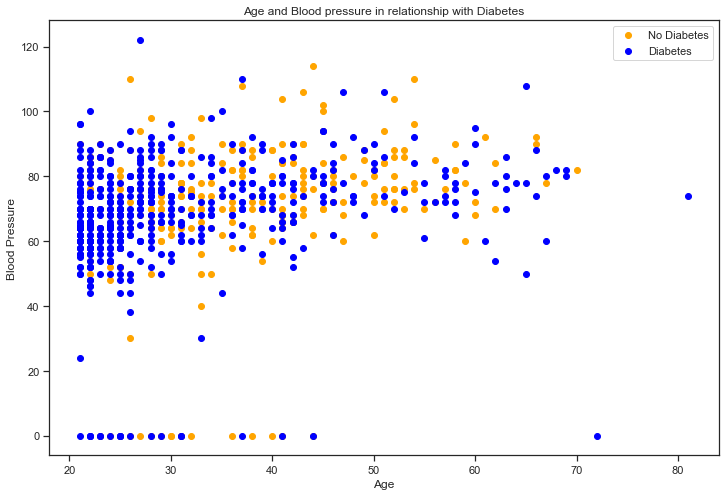

In [236]:
plt.figure(figsize=(12,8))
plt.scatter(df.Age[df.Outcome==1],df.BloodPressure[df.Outcome==1],c="orange");
plt.scatter(df.Age[df.Outcome==0],df.BloodPressure[df.Outcome==0],c="blue");
plt.title("Age and Blood pressure in relationship with Diabetes")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["No Diabetes","Diabetes"]);

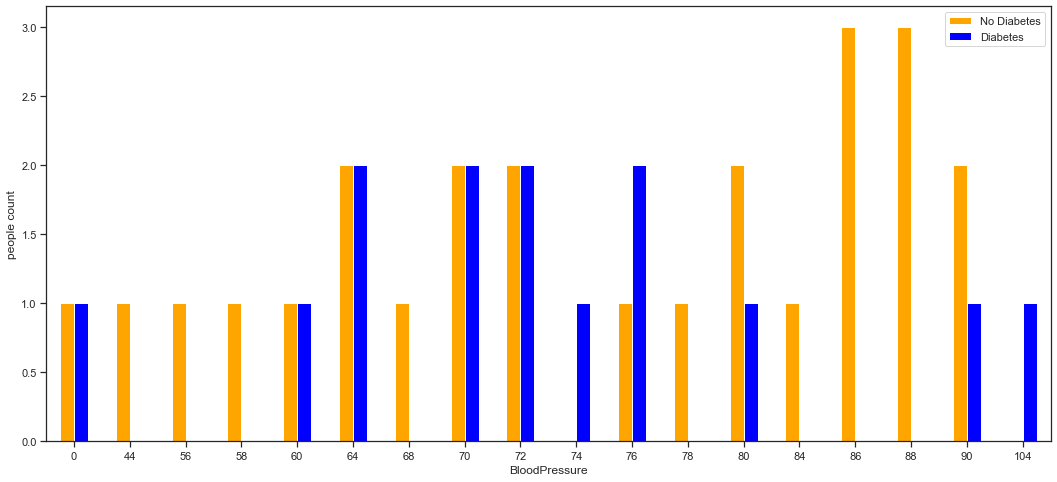

In [239]:
pd.crosstab(df.BloodPressure[::20], df.Outcome).plot(kind="bar",figsize=(18,8),color=["orange","blue"])
plt.ylabel("people count");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);


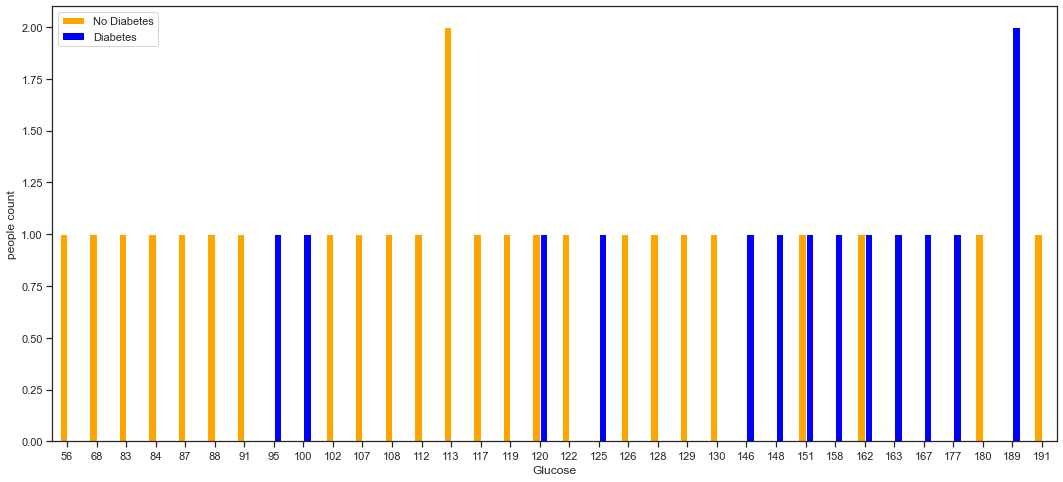

In [238]:
pd.crosstab(df.Glucose[::20], df.Outcome).plot(kind="bar",figsize=(18,8),color=["orange","blue"])
plt.ylabel("people count");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

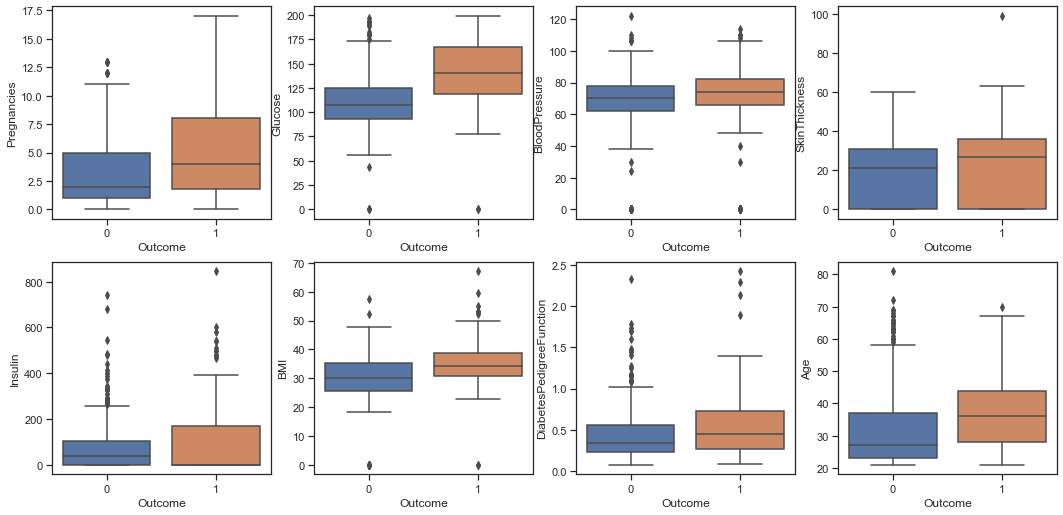

In [277]:
plt.figure(figsize=(18,18))
for column_index, column in enumerate(df.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='Outcome', y=column, data=df)

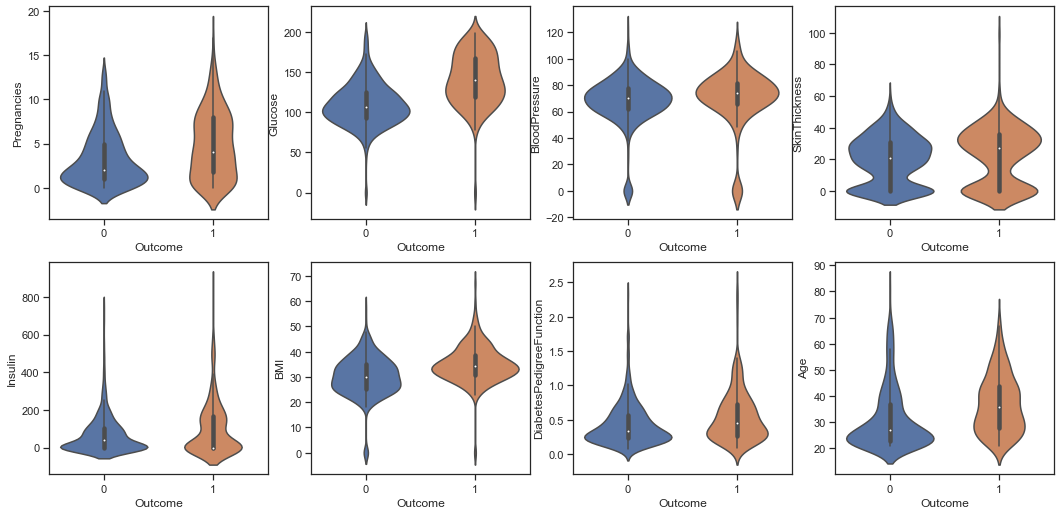

In [282]:
plt.figure(figsize=(18,18))
for column_index, column in enumerate(df.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=df)

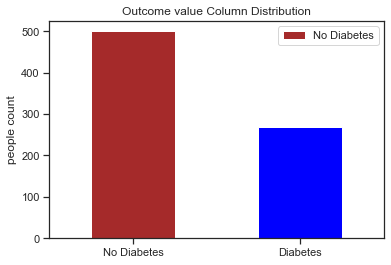

In [332]:
df["Outcome"].value_counts().plot(kind="bar",color=["brown","blue"])
plt.xticks(np.arange(2),('No Diabetes', 'Diabetes'),rotation=0)
plt.title('Outcome value Column Distribution')
plt.ylabel('people count')
plt.legend(["No Diabetes","Diabetes"]);
plt.show()

SyntaxError: invalid syntax (421992348.py, line 8)

In [120]:
df.describe().columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
df.isnull().values.any()

False

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [33]:
((df[df.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [48]:
df.nunique() 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

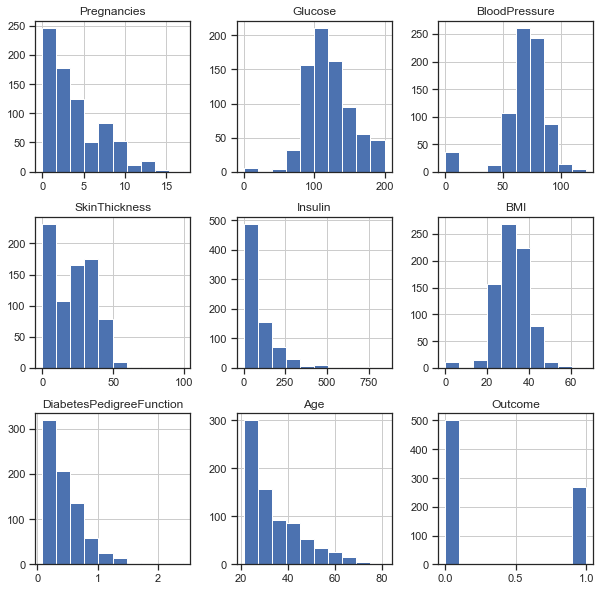

In [187]:
df.hist(figsize = (10,10))

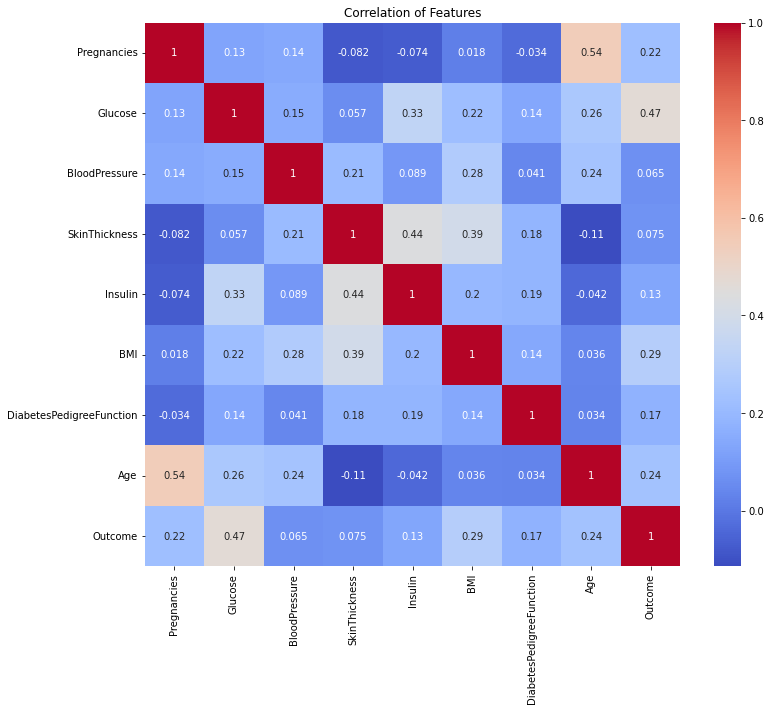

In [56]:
plt.figure(figsize=(12,10))
plt.title('Correlation of Features')
p = sns.heatmap(df.corr(), annot=True,cmap ='coolwarm')

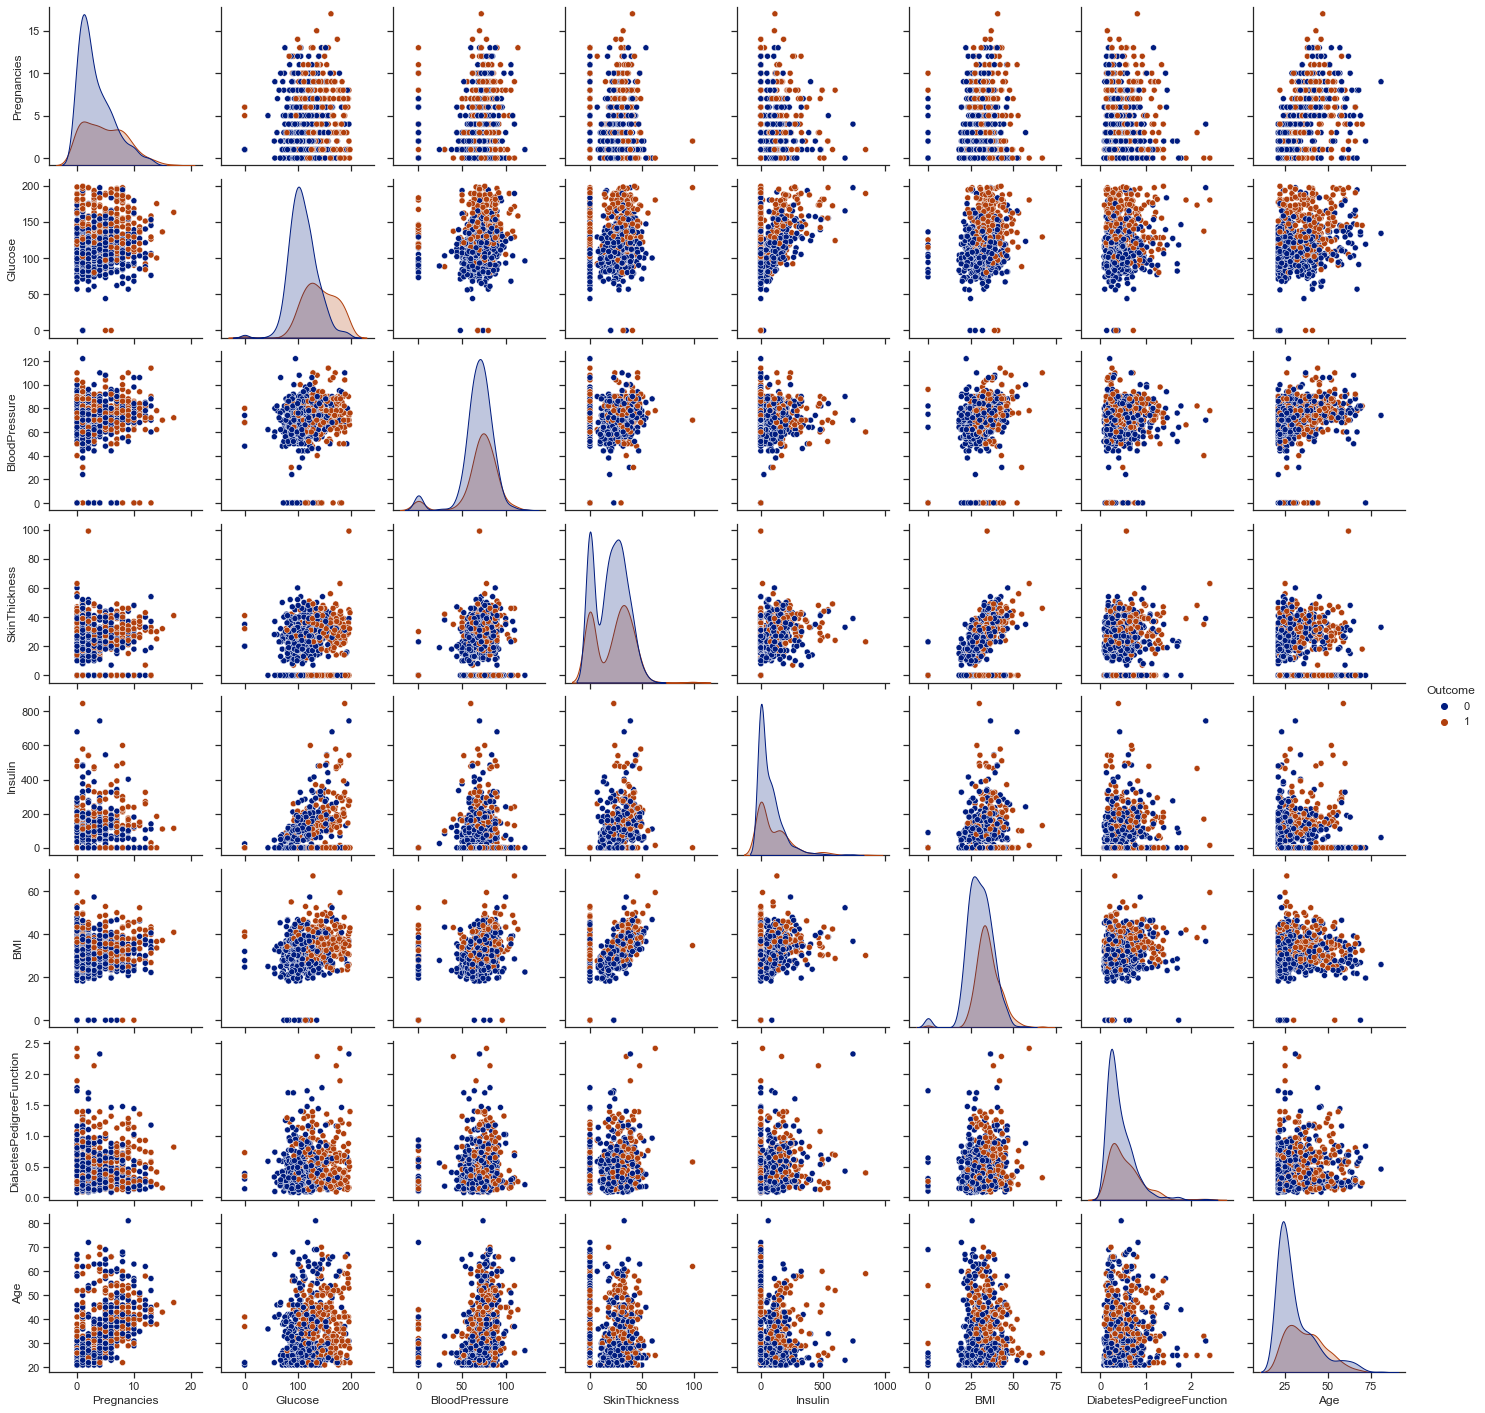

In [189]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(df, hue='Outcome',palette='dark')

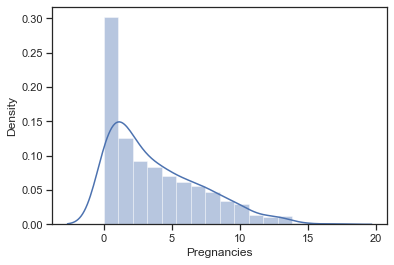

In [320]:
sns.distplot(df['Pregnancies'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


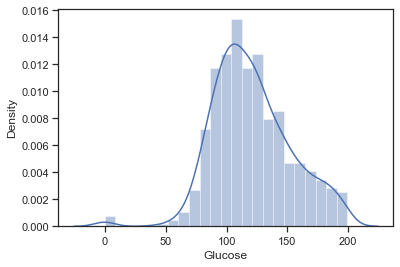

In [321]:
sns.distplot(df['Glucose'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


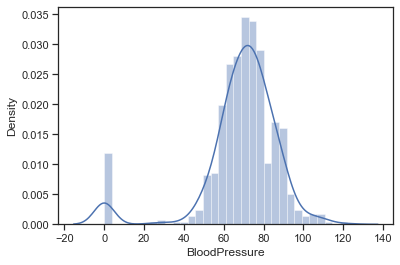

In [322]:
sns.distplot(df['BloodPressure'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


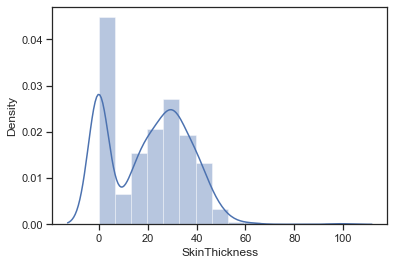

In [324]:
sns.distplot(df['SkinThickness'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


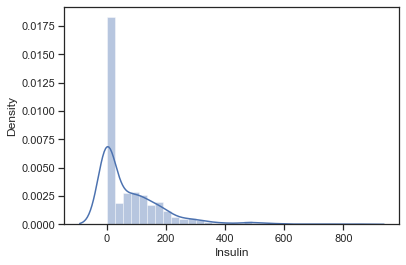

In [325]:
sns.distplot(df['Insulin'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


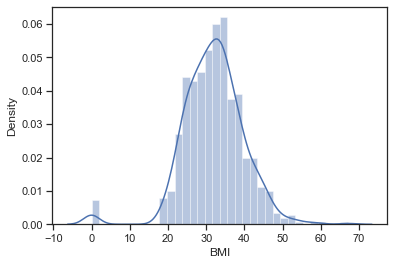

In [326]:
sns.distplot(df['BMI'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


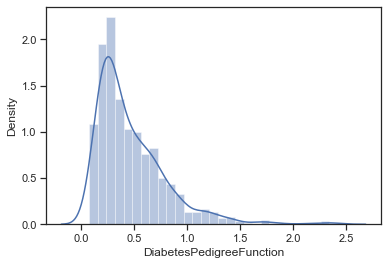

In [327]:
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


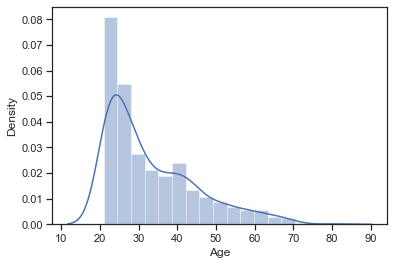

In [328]:
sns.distplot(df['Age'])
plt.show()

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

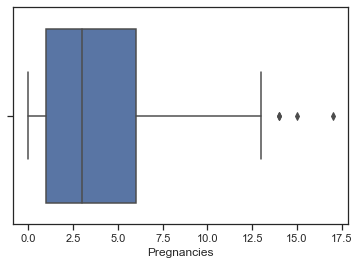

In [158]:
sns.boxplot(df['Pregnancies'])

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

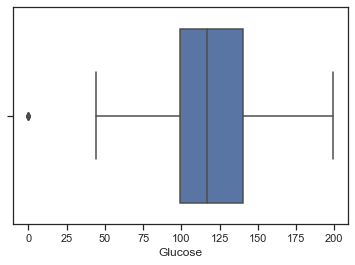

In [159]:
sns.boxplot(df['Glucose'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

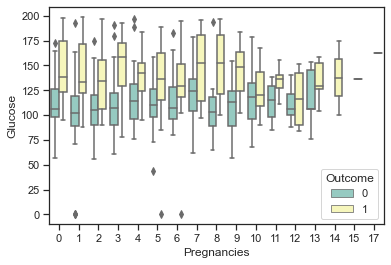

In [244]:
sns.boxplot(x='Pregnancies', y='Glucose', hue='Outcome',
                 data=df, palette='Set3')

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

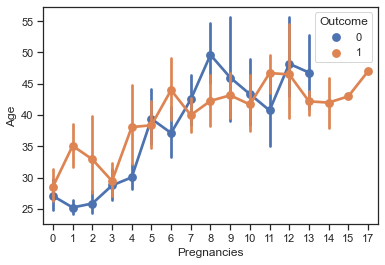

In [184]:
# To find max pregmancy women who were Diabetic
sns.pointplot(x=df['Pregnancies'],y= df['Age'],hue=df['Outcome'])

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


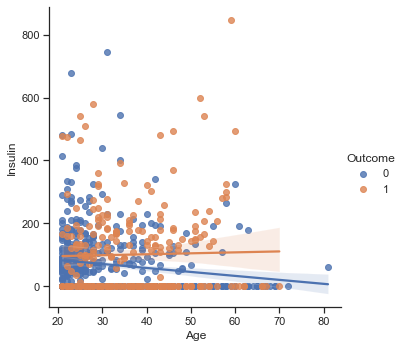

In [248]:
sns.lmplot('Age','Insulin',hue='Outcome',data=df)

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


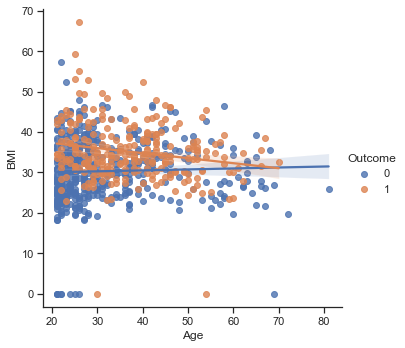

In [247]:
sns.lmplot('Age','BMI',hue='Outcome',data=df)

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


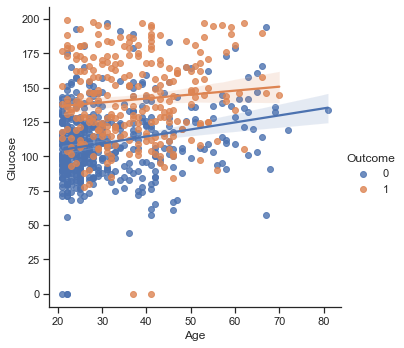

In [249]:
sns.lmplot('Age','Glucose',hue='Outcome',data=df)

c:\users\akeis\pycharmprojects\pythonproject14\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


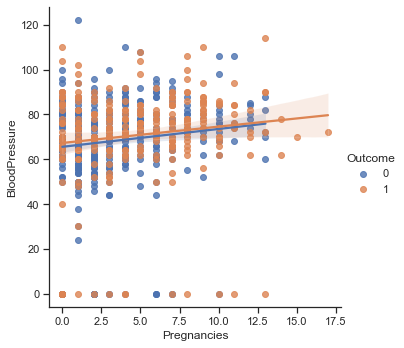

In [250]:
sns.lmplot('Pregnancies','BloodPressure',hue='Outcome',data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Pregnancies', ylabel='BloodPressure'>

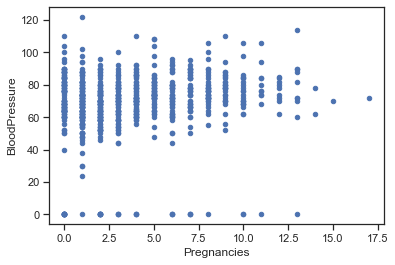

In [252]:
df.plot.scatter('Pregnancies','BloodPressure')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

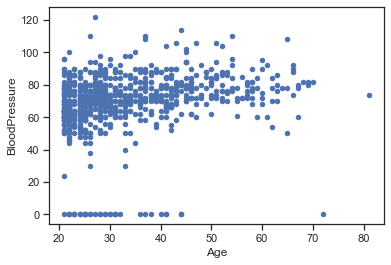

In [253]:
df.plot.scatter('Age','BloodPressure')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='BMI'>

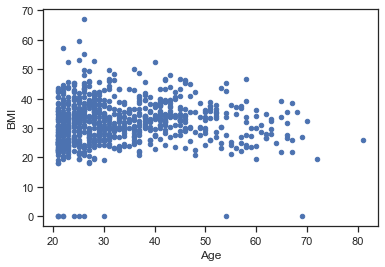

In [254]:
df.plot.scatter('Age','BMI')

In [294]:
Multivariate analysis =df.groupby('Outcome')[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']].plot.hist()

SyntaxError: invalid syntax (2717412045.py, line 1)

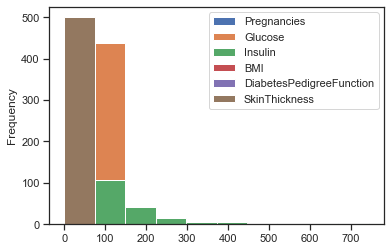

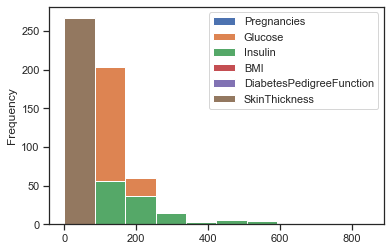

In [297]:
multivariate=df.groupby('Outcome')[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']].plot.hist()

In [298]:
print(' count of zero values in Glucose ',df[df['Glucose']==0].shape[0])

 count of zero values in Glucose  5


In [299]:
print(' count of zero values in Age ',df[df['Age']==0].shape[0])

 count of zero values in Age  0


In [300]:
print(' count of zero values in BloodPressure ',df[df['BloodPressure']==0].shape[0])

 count of zero values in BloodPressure  35


In [301]:
print(' count of zero values in Insulin ',df[df['Insulin']==0].shape[0])

 count of zero values in Insulin  374


In [302]:
print(' count of zero values in BMI ',df[df['BMI']==0].shape[0])

 count of zero values in BMI  11


In [303]:
print(' count of zero values in Pregnancies ',df[df['Pregnancies']==0].shape[0])

 count of zero values in Pregnancies  111


In [304]:
print(' count of zero values in SkinThickness ',df[df['SkinThickness']==0].shape[0])

 count of zero values in SkinThickness  227


In [305]:
print(' count of zero values in DiabetesPedigreeFunction ',df[df['DiabetesPedigreeFunction']==0].shape[0])

 count of zero values in DiabetesPedigreeFunction  0


In [7]:
df.describe().T[['min', 'mean', 'max']][:-1].style.background_gradient(cmap='Blues')

,min,mean,max
Pregnancies,0.000000,3.845052,17.000000
Glucose,0.000000,120.894531,199.000000
BloodPressure,0.000000,69.105469,122.000000
SkinThickness,0.000000,20.536458,99.000000
Insulin,0.000000,79.799479,846.000000
BMI,0.000000,31.992578,67.100000
DiabetesPedigreeFunction,0.078000,0.471876,2.420000
Age,21.000000,33.240885,81.000000


In [22]:
stc_X = StandardScaler()
X =  pd.DataFrame(stc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['BloodPressure', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Glucose'])

In [23]:
X.head()

,BloodPressure,Age,Pregnancies,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Glucose
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [21]:
X = df.drop('Outcome',axis=1).values
y = df.Outcome

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=8)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
desc_tree = DecisionTreeClassifier()
desc_tree.fit(X_train, y_train)
from sklearn import metrics

desc_predictions = desc_tree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,desc_predictions)))

Accuracy Score = 0.7291666666666666


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,desc_predictions))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       119
           1       0.65      0.62      0.63        73

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



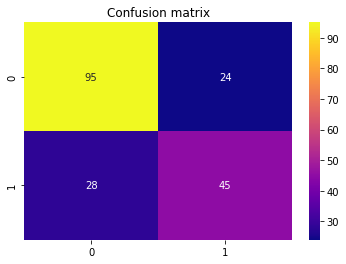

In [49]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, desc_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,knn_predict)))

Accuracy Score = 0.734375


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       119
           1       0.75      0.45      0.56        73

    accuracy                           0.73       192
   macro avg       0.74      0.68      0.69       192
weighted avg       0.74      0.73      0.72       192



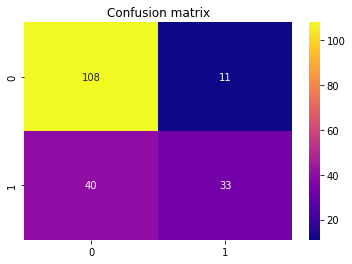

In [50]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, knn_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predict =logreg.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,logreg_predict)))

Accuracy Score = 0.71875


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logreg_predict))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       119
           1       0.68      0.49      0.57        73

    accuracy                           0.72       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.71      0.72      0.71       192



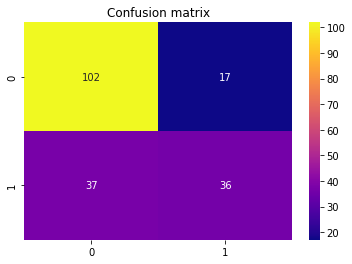

In [51]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logreg_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=30)
rand_for.fit(X_train, y_train)
rand_for_predict = rand_for.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,rand_for_predict)))

Accuracy Score = 0.7447916666666666


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rand_for_predict))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       119
           1       0.72      0.53      0.61        73

    accuracy                           0.74       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



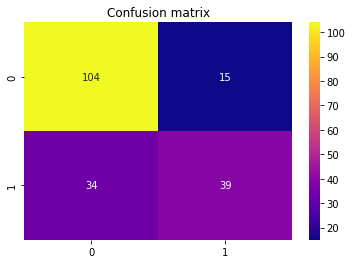

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, rand_for_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [34]:
from sklearn.svm import SVC ,SVR
svc= SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,svc_predict)))

Accuracy Score = 0.7552083333333334


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       119
           1       0.75      0.53      0.62        73

    accuracy                           0.76       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.75      0.76      0.74       192



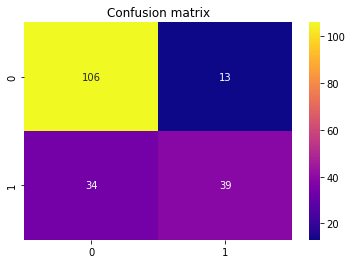

In [53]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, svc_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB
nby_model = GaussianNB()
nby_model.fit(X_train, y_train)
nby_model_predict = nby_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,nby_model_predict)))

Accuracy Score = 0.7083333333333334


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nby_model_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       119
           1       0.63      0.58      0.60        73

    accuracy                           0.71       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.70      0.71      0.71       192



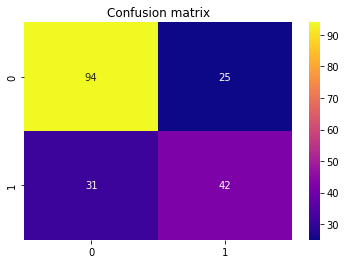

In [54]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, nby_model_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="plasma",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

In [59]:
import pickle
# Save trained model to file
pickle.dump("desc_tree,knn,logreg,rand_for,svc,nby_model", open("Diabetes.pkl", "wb"))
ml_model = pickle.load(open("Diabetes.pkl", "rb"))